In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Part A: Model Code (65 pts)

1. Write a function to calculate and return the Euclidean distance of two vectors

In [2]:
def Euc_distance(X, Y):             
    if(len(X)!=len(Y) or 0 == len(X)):                       # not the same lenth, return -1
        return -1
    euc = 0
    for ind in range(len(X)):
        euc = euc+(X[ind]-Y[ind])**2
    return math.sqrt(euc)

In [3]:
X = [1,2]
Y = [2,4,1]
print(Euc_distance(X,Y))
X = []
Y = []
print(Euc_distance(X,Y))

-1
-1


2. Write a function to calculate and return the Manhattan distance of two vectors

In [4]:
def Man_distance(X, Y):
    if(len(X)!=len(Y) or 0 == len(X)):
        return -1
    man = 0
    for ind in range(len(X)):
        man = man+abs(X[ind]-Y[ind])
    return man

In [5]:
X = [1,2]
Y = [2,4,1]
print(Man_distance(X,Y))
X = [1,2]
Y = [2,4]
print(Man_distance(X,Y))

-1
3


3. Write a function to calculate and return the accuracy and generalization error of two vectors.  
Misclassification Rate/Generalization Error = 1 − 𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦

In [543]:
thresholds1 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.2]
thresholds2 = [2., 1., 0.8, 0.6, 0.4, 0.2, 0.]
thres_stander = 0.5

In [189]:
def accuracy_generror(X, Y):   # input should be the same type
    if(len(X)!=len(Y) or 0 == len(X)):
        print("Invalid input")
        return -1, -1
    true_pre = 0
    for ind in range(len(X)):
        if(X[ind]>thres_stander):
            X[ind] = 1
        else:
            X[ind] = 0
        if(X[ind] == Y[ind]):
            true_pre = true_pre+1
    print(true_pre, len(X))
    acc = true_pre/len(X)
    generror = 1-acc
    return acc, generror

In [348]:
X = [1,2]
Y = [2,4,1]
print(accuracy_generror(X,Y))
X = [1,0,1,1,1]
Y = [1,0,0,1,0]
print(accuracy_generror(X,Y))

Invalid input
(-1, -1)
3 5
(0.6, 0.4)


4. Write three functions to compute: precision, recall and F1 score.

In [191]:
def precision_fun(predct, label):
    if(len(predct)!=len(label) or 0 == len(predct)):
        print("Invalid input")
        return -1
    TP = 0
    FP = 0
    for ind in range(len(predct)):
        if(True == label[ind] and True == predct[ind]):
            TP = TP+1
        if(False == label[ind] and True == predct[ind]):
            FP = FP+1
    if(0 == TP+FP):
        print("no positive prediction")
        return -1
    else:
        return TP/(TP+FP)

def recall_fun(predct, label):
    if(len(predct)!=len(label) or 0 == len(predct)):
        print("Invalid input")
        return -1
    TP = 0
    FN = 0
    for ind in range(len(predct)):
        if(True == label[ind] and True == predct[ind]):
            TP = TP+1
        if(True == label[ind] and False == predct[ind]):
            FN = FN+1
    if(0 == TP+FN):
        print("no positive instances")
        return -1
    else:
        return TP/(TP+FN)

    
def F1_fun(predct, label):
    pre = precision_fun(predct, label)
    rec = recall_fun(predct, label)
    
    if(-1 != pre and -1 != rec):
        F1 = 2/(1/pre+1/rec)
    return F1

In [192]:
X = [1,0,1,1]
Y = [1,1,0,1]
print(precision_fun(X,Y))
print(recall_fun(X,Y))
print(F1_fun(X,Y))

0.6666666666666666
0.6666666666666666
0.6666666666666666


5. Write a function to compute the confusion matrix of two vectors

In [470]:
def conf_matrix(predct, label):
    if(len(predct)!=len(label) or 0 == len(predct)):
        print("Invalid input")
        return -1
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for ind in range(len(predct)):
        if(True == label[ind] and True == predct[ind]):
            TP = TP+1
        if(False == label[ind] and True == predct[ind]):
            FP = FP+1
        if(False == label[ind] and False == predct[ind]):
            TN = TN+1
        if(True == label[ind] and False == predct[ind]):
            FN = FN+1   
#     print(TN, FP)
#     print(FN, TP)
    return np.array([[TN, FP], [FN, TP]])

In [471]:
X = [1,0,1,1, 0]
Y = [1,1,0,1, 0]
print(conf_matrix(X, Y))

[[1 1]
 [1 2]]


6. Write a function to generate the Receiver Operating Characteristic (ROC) curve

In [740]:
def ROC_curve(scores, label):
    FPR = []
    TPR = []
    for thres in thresholds2:
        new_label = []
        for ind in range(len(scores)):
            if(thres > scores[ind]):
                new_label.append(0)
            else:
                new_label.append(1)
        [[TN, FP], [FN, TP]] = conf_matrix(new_label, label)
        TPR.append(TP/(TP+FN))
        FPR.append(FP/(FP+TN))
    
    plt.figure()
    plt.plot(FPR, TPR, color='darkorange',
             lw=2, label='ROC curve')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('ROC Curve') 
    plt.show 
    
    return FPR, TPR

[0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0]
[0.0, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


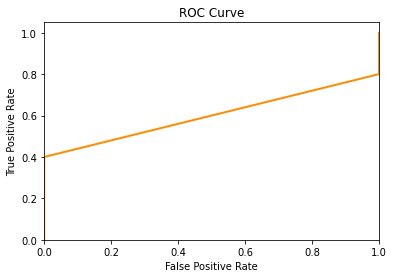

In [741]:
X = [0.,0.25, 0.37, 0.4, 0.58, 0.69, 0.93]
Y = [1,1,0,1, 0, 1,1]
FPR, TPR = ROC_curve(X, Y)
print(FPR)
print(TPR)

7. Write a function to compute area under curve (AUC) for the ROC curve

In [488]:
def AUC_func(FPR, TPR):
    auc = 0
    for ind in range(len(FPR)-1):
        if(FPR[ind+1] != FPR[ind]):
            auc = auc+abs(FPR[ind]-FPR[ind+1])*TPR[ind+1]
    return auc    

In [489]:
print(AUC_func(FPR, TPR))

0.7


8. Write a function to generate the precision-recall curve

In [817]:
def pre_rec_curve(scores, label):
    pre = []
    rec = []
    for thres in thresholds1:
        new_label = []
        for ind in range(len(scores)):
            if(thres > scores[ind]):
                new_label.append(0)
            else:
                new_label.append(1)
        [[TN, FP], [FN, TP]] = conf_matrix(new_label, label)
        if(0 != (TP+FP) and 0 != (TP+FN)):
            rec.append(TP/(TP+FN))
            pre.append(TP/(TP+FP))
        elif(0 != (TP+FN) and 0 == (TP+FP)):
            rec.append(TP/(TP+FN))
            pre.append(1.0)
        else:
            rec.append(1.0)
            pre.append(TP/(TP+FP))
            
    
    plt.figure()

    
    plt.plot(thresholds1,rec, color='b',
             lw=2, label='precision-recall curve')
    plt.plot(thresholds1,pre,  color='r',
             lw=2, label='precision-recall curve')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    

    plt.xlim([0.00, 1.05])
    plt.ylim([0.00, 1.05])
    plt.xlabel('threshold') 
    plt.ylabel('presicion/recall') 
    plt.title('precision-recall curve') 
    plt.show 
    
    plt.figure()

    
    plt.plot(rec,pre, color='b',
             lw=2, label='precision-recall curve')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    

    plt.xlim([0.00, 1.05])
    plt.ylim([min(pre), 1.05])
    plt.xlabel('recall') 
    plt.ylabel('presicion') 
    plt.title('precision-recall curve') 
    plt.show 
    
    return pre, rec

[0.7142857142857143, 0.6666666666666666, 0.75, 1.0, 1.0, 1.0]
[1.0, 0.8, 0.6, 0.4, 0.2, 0.0]


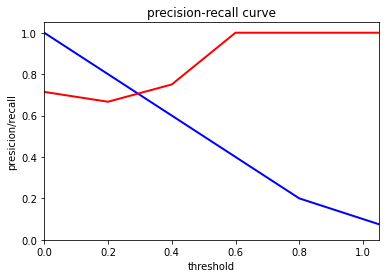

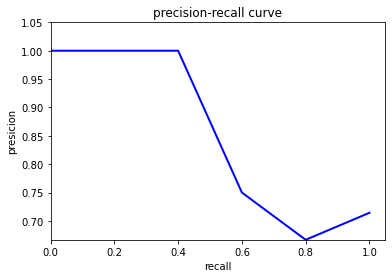

In [818]:
X = [0.,0.25, 0.37, 0.4, 0.58, 0.69, 0.93]
Y = [1,1,0,1, 0, 1,1]
pre, rec = pre_rec_curve(X, Y)
print(pre)
print(rec)

In [795]:
# vect = [[2,5], [1,3],[6,2]]
# for ind in range(len(vect)):
#     if(2.5<vect[ind][1]):
#         vect[ind] = [8, 2.5]
#         break 
# vect = sorted(vect, reverse=True, key=lambda x: x[1])
# print(vect)

[[1, 3], [8, 2.5], [6, 2]]


9. Implement a KNN_Classifier model class

In [852]:
class KNN_Classifier:
    def __init__(self):
        pass
    
    def vote_class(self, neighbr_index_list):
        if('distance'== self.weight):
            ret0 = 0
            ret1 = 0
            for ele in range(len(neighbr_index_list)):
                if(0 == neighbr_index_list[ele][1]):              # if distance is 0 then return the label probability 0 or 1
                    if(0 == self.Y[neighbr_index_list[ele][0]]):
#                         print("dist is 0 and label is 0")
                        return 0.0
                    else: 
#                         print("dist is 0 and label is 1")
                        return 1.0
                else:                                             # if distance is not 0 then calculate with different weights
                    if(0 == self.Y[neighbr_index_list[ele][0]]):
#                         print("dist is not 0 and label is 0, rot0:", ret0)
                        ret0 = ret0+(ele+1)*(1/neighbr_index_list[ele][1])                              #far distance has little weight
                    else:
#                         print("dist is not 0 and label is 1, rot1:", neighbr_index_list[ele][1])
                        ret1 = ret1+(ele+1)*(1/neighbr_index_list[ele][1])
        else:           
            ret0 = 0
            ret1 = 0
            for ele in neighbr_index_list:
                if(0 == ele[1]):
                    if(0 == self.Y[ele[0]]):
                        return 0.0
                    else: 
                        return 1.0
                else:
                    if(0 == self.Y[ele[0]]):
                        ret0 = ret0+1
                    else:
                        ret1 = ret1+1
#         print(ret1, ret0)
        return ret1/(ret0+ret1)    
            
    def iterate_neighbor(self, vect, index, distancce):
#         print("input", vect)
        for ind in range(len(vect)):
#             print("index", index, ind, vect[ind])
#             print(distancce, vect[ind][1])
            if(distancce<vect[ind][1]):
                vect[ind] = [index, distancce]
                break 
#         print("before sort", vect)
        vect = sorted(vect, reverse=True, key=lambda x: x[1])
#         print("after sort",vect)
        return vect

    # 
    def covert_func(self, score): 
        ret = []
        for ele in score:
            if ele > 0.5:
                ret.append(1)
            else:
                ret.append(0)
        return np.array(ret)
    
    def fit(self, X, Y, n_neighbors, weights, kwargs):
        self.X = X
        self.Y = Y
        self.kwargs = kwargs
        self.n_neighbors = n_neighbors
        self.weight = weights
        
    # calculate the probabily of the predicted value is 1    
    def predict_probe(self, X):
        euc_dist_neighbr = []                                 # The probabilities of the positive class
        man_dist_neighbr = []

        for tst in X:
            ind_euc_dist = []                               # Neighbours indexes and distances[index, distance]  euclidean
            ind_man_dist = []                               # manhattan distance
            
            for ind in range(len(self.X)):                         #get the distance of the target vector with the train instances
                dt = Euc_distance(self.X[ind], tst)
                dt_man = Man_distance(self.X[ind], tst)
                             
                if(len(ind_euc_dist)<self.n_neighbors):               # if the neighbourhood list less than the neighour number, add
                    ind_euc_dist.append([ind, dt])
                    ind_euc_dist = sorted(ind_euc_dist, reverse=True, key=lambda x: x[1])
                    
                    ind_man_dist.append([ind, dt_man])
                    ind_man_dist = sorted(ind_man_dist, reverse=True, key=lambda x: x[1])  

                else:                                             # if the neighborhood is alrady full, then compare the distance if change
                    ind_euc_dist = self.iterate_neighbor(ind_euc_dist, ind, dt)
                    ind_man_dist = self.iterate_neighbor(ind_man_dist, ind, dt_man)
#             print(ind_euc_dist)
#             print(ind_man_dist)

            euc_dist_neighbr.append(self.vote_class(ind_euc_dist))  # according the neighbour list to compute the probability of label 1
            man_dist_neighbr.append(self.vote_class(ind_man_dist))
        
        if(1 == self.kwargs["distance"]):
            return euc_dist_neighbr
        else:
            return man_dist_neighbr
    
    def predict(self, X):
        ret = self.predict_probe(X)   
#         print(ret)
        nbr = self.covert_func(ret)   # according the probability to convert to binary
        return nbr

In [497]:
X = [[1,1], [2,1], [3,2], [2,4]]
Y = [1,0,0,1]
kwargs = {"neighbr":3, "distance": 1, "weight":""}
if(1 == kwargs["distance"]):
    print("hello")

hello


In [498]:
model1 = KNN_Classifier()
model1.fit(X, Y, 3, "", kwargs)

In [499]:
X = [[4,1], [5,5], [3,3], [1,1], [2.0,0.5]]
e= model1.predict(X)

0.3333333333333333 1.2071067811865475
0.3333333333333333 1.0
0.31622776601683794 0.4773500981126146
0.25 0.34285714285714286
0.7071067811865475 1.4472135954999579
0.5 1.3333333333333333
0.8944271909999159 2.5547001962252294
0.6666666666666666 2.4
[0.21638837510877568, 0.39848360231637364, 0.32822730956763585, 1.0, 0.2593198483514089]


In [500]:
print(e)

[0 0 0 1 0]


In [501]:
print(model1.predict_probe(X))

0.3333333333333333 1.2071067811865475
0.3333333333333333 1.0
0.31622776601683794 0.4773500981126146
0.25 0.34285714285714286
0.7071067811865475 1.4472135954999579
0.5 1.3333333333333333
0.8944271909999159 2.5547001962252294
0.6666666666666666 2.4
[0.21638837510877568, 0.39848360231637364, 0.32822730956763585, 1.0, 0.2593198483514089]


# Part B: Data Processing(25pts)

10. Read in the winequality-white.csv file as a Pandas data frame.

In [820]:
data = pd.read_csv("winequality-white.csv")

In [821]:
print(len(data))

4898


In [822]:
data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...

In [823]:
colmn = str(data.columns)
colmns = colmn.translate({ord(i): None for i in '"][\')(,'})[5:-13].replace(' ', '_').split(";")
print(colmns)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [824]:
fixed_acidity = []
volatile_acidity = []
citric_acid = []
residual_sugar = []
chlorides = []
free_sulfur_dioxide = []
total_sulfur_dioxide = []
density = []
pH = []
sulphates = []
alcohol = []
quality = []

In [825]:
for index, row in data.iterrows():
    fixed_acidity.append(float(row[0].split(";")[0]))
    volatile_acidity.append(float(row[0].split(";")[1]))
    citric_acid.append(float(row[0].split(";")[2]))
    residual_sugar.append(float(row[0].split(";")[3]))
    chlorides.append(float(row[0].split(";")[4]))
    free_sulfur_dioxide.append(float(row[0].split(";")[5]))
    total_sulfur_dioxide.append(float(row[0].split(";")[6]))
    density.append(float(row[0].split(";")[7]))
    pH.append(float(row[0].split(";")[8]))
    sulphates.append(float(row[0].split(";")[9]))
    alcohol.append(float(row[0].split(";")[10]))
    quality.append(float(row[0].split(";")[11]))

In [826]:
print(len(fixed_acidity))

4898


In [827]:
fixed_acidity[:5]

[7.0, 6.3, 8.1, 7.2, 7.2]

In [828]:
df = pd.DataFrame(data=zip(fixed_acidity,volatile_acidity,citric_acid, 
                  residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, 
                  density, pH, sulphates, alcohol, quality) ,columns=colmns)

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [830]:
df = df.drop_duplicates()

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   float64
dtypes: float64(12)
memory usage: 402.3 KB


In [832]:
df.head(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free_sulfur_dioxide  total_sulfur_dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8      6.0  
1      9.5      6.0

11. The target will be the “quality” column which represents rating of wine and ranges from 3 to 8.  
You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5).  
Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [833]:
for ind in range(len(df)):
    print(df.iloc[ind]['quality'])
    if(df.iloc[ind]['quality']>5):
        df.iloc[ind]['quality'] = 1
    else:
        df.iloc[ind]['quality']  = 0

6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
7.0
5.0
7.0
6.0
8.0
6.0
5.0
7.0
8.0
5.0
6.0
6.0
6.0
6.0
6.0
7.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
7.0
4.0
5.0
5.0
6.0
7.0
7.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
6.0
5.0
7.0
5.0
8.0
5.0
6.0
5.0
5.0
6.0
7.0
7.0
5.0
5.0
6.0
6.0
5.0
6.0
5.0
6.0
6.0
6.0
5.0
7.0
7.0
7.0
6.0
6.0
7.0
4.0
5.0
5.0
5.0
5.0
6.0
6.0
5.0
6.0
5.0
5.0
5.0
4.0
6.0
6.0
5.0
5.0
5.0
5.0
6.0
6.0
6.0
5.0
7.0
7.0
6.0
5.0
5.0
5.0
5.0
5.0
6.0
5.0
7.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
4.0
7.0
6.0
7.0
6.0
5.0
6.0
6.0
7.0
8.0
5.0
5.0
5.0
5.0
6.0
7.0
5.0
5.0
6.0
6.0
4.0
7.0
5.0
6.0
4.0
5.0
4.0
6.0
6.0
5.0
5.0
6.0
5.0
5.0
6.0
5.0
8.0
4.0
6.0
6.0
5.0
5.0
6.0
5.0
5.0
5.0
5.0
5.0
6.0
4.0
5.0
5.0
4.0
5.0
6.0
5.0
7.0
6.0
7.0
5.0
5.0
5.0
5.0
6.0
6.0
6.0
5.0
6.0
6.0
4.0
6.0
6.0
6.0
6.0
7.0
6.0
5.0
5.0
7.0
6.0
5.0
6.0
7.0
7.0
7.0
5.0
4.0
3.0
3.0
6.0
8.0
7.0
6.0
4.0
6.0
5.0
5.0
6.0
6.0
6.0
5.0
6.0
6.0
5.0
5.0
5.0
5.0
6.0
6.0
5.0
4.0
7.0
8.0
8.0
4.0
5.0
5.0
5.0
6.0
7.0
6.0
5.0
7.0
3.0
6.0


6.0
8.0
6.0
5.0
7.0
7.0
5.0
5.0
5.0
5.0
6.0
7.0
5.0
6.0
7.0
5.0
5.0
6.0
6.0
5.0
5.0
6.0
6.0
7.0
6.0
5.0
4.0
6.0
8.0
6.0
6.0
5.0
8.0
7.0
8.0
6.0
5.0
4.0
5.0
8.0
6.0
5.0
5.0
8.0
6.0
6.0
6.0
5.0
5.0
5.0
7.0
5.0
6.0
6.0
7.0
7.0
6.0
5.0
7.0
5.0
8.0
6.0
5.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
7.0
7.0
7.0
6.0
6.0
6.0
7.0
7.0
7.0
6.0
7.0
7.0
7.0
6.0
8.0
6.0
7.0
6.0
6.0
7.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
8.0
6.0
4.0
5.0
7.0
6.0
5.0
6.0
8.0
6.0
5.0
6.0
6.0
7.0
5.0
6.0
6.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
5.0
6.0
5.0
4.0
7.0
5.0
6.0
6.0
5.0
5.0
5.0
6.0
5.0
8.0
5.0
6.0
4.0
6.0
8.0
7.0
6.0
5.0
5.0
7.0
5.0
5.0
5.0
6.0
7.0
6.0
6.0
3.0
6.0
7.0
6.0
6.0
7.0
6.0
7.0
5.0
7.0
7.0
7.0
6.0
6.0
5.0
6.0
6.0
5.0
4.0
6.0
7.0
5.0
6.0
6.0
7.0
7.0
5.0
6.0
6.0
5.0
5.0
7.0
5.0
6.0
6.0
6.0
5.0
6.0
6.0
6.0
5.0
6.0
6.0
6.0
7.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
7.0
5.0
7.0
6.0
6.0
6.0
6.0
6.0
7.0
6.0
6.0
6.0
6.0
8.0
8.0
8.0
6.0
5.0
6.0
4.0
6.0
6.0
5.0
7.0
6.0
4.0
7.0
8.0
5.0
7.0
6.0
5.0
6.0
7.0
6.0
7.0
7.0
7.0
5.0
7.0
7.0
6.0
5.0
5.0


In [834]:
df.head(15)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
6             6.2              0.32         0.16            7.00      0.045   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   
15            6.6              0.17         0.38            1.50      0.032   
16            6.3              0.48         0.04            1.10      0.046   
17            6.2              0.66         0.48            1.20      0.029   
18            7.4              0.34         0.42            1.10      0.033   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
6                  30.0                 136.0   0.9949  3.18       0.47   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   
16                 30.0                  99.0   0.9928  3.24       0.36   
17                 29.0                  75.0   0.9892  3.33       0.39   
18                 17.0                 171.0   0.9917  3.12       0.53   

    alcohol  quality  
0       8.8      1.0  
1       9.5      1.0  
2      10.1      1.0  
3       9.9      1.0  
6       9.6      1.0  
9      11.0      1.0  
10     12.0      0.0  
11      9.7      0.0  
12     10.8      0.0  
13     12.4      1.0  
14      9.7      0.0  
15     11.4      1.0  
16      9.6      1.0  
17     12.8      1.0  
18     11.3      1.0

In [129]:
#df.to_csv('temp_winequality-white.csv', index=False)

In [835]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8      1.0  
1      9.5      1.0  
2     10.1      1.0  
3      9.9      1.0  
6      9.6      1.0

12. Use the techniques from the first recitation to summarize each of the variables in the dataset 
in terms of mean, standard deviation, and quartiles.  
Include this in your report. [3 pts]

In [836]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     0.659682  
std       0.151546     0.113523     1.217076     0.473876  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.480000    10.400000     1.000000  
75%       3.290000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

In [837]:
df.mean()

fixed_acidity             6.839346
volatile_acidity          0.280538
citric_acid               0.334332
residual_sugar            5.914819
chlorides                 0.045905
free_sulfur_dioxide      34.889169
total_sulfur_dioxide    137.193512
density                   0.993790
pH                        3.195458
sulphates                 0.490351
alcohol                  10.589358
quality                   0.659682
dtype: float64

In [838]:
df.std(axis = 0)

fixed_acidity            0.866860
volatile_acidity         0.103437
citric_acid              0.122446
residual_sugar           4.861646
chlorides                0.023103
free_sulfur_dioxide     17.210021
total_sulfur_dioxide    43.129065
density                  0.002905
pH                       0.151546
sulphates                0.113523
alcohol                  1.217076
quality                  0.473876
dtype: float64

13. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names

In [839]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8      1.0  
1      9.5      1.0  
2     10.1      1.0  
3      9.9      1.0  
6      9.6      1.0

In [840]:
df = df.sample(frac=1).reset_index(drop=True)

In [841]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.2              0.33         0.29             1.3      0.042   
1            7.7              0.39         0.28             4.9      0.035   
2            7.6              0.28         0.17             1.6      0.046   
3            6.5              0.26         0.39             1.4      0.020   
4            6.0              0.34         0.66            15.9      0.046   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 26.0                 138.0  0.99560  3.77       0.64   
1                 36.0                 109.0  0.99180  3.19       0.58   
2                 28.0                 117.0  0.99288  3.08       0.43   
3                 12.0                  66.0  0.99089  3.25       0.75   
4                 26.0                 164.0  0.99790  3.14       0.50   

   alcohol  quality  
0      9.5      0.0  
1     12.2      1.0  
2     10.0      0.0  
3     11.3      1.0  
4      8.8      1.0

14. Generate pair plots using the seaborn package. This will be used to identify and report the
redundant features, if there is any. [2 pts]

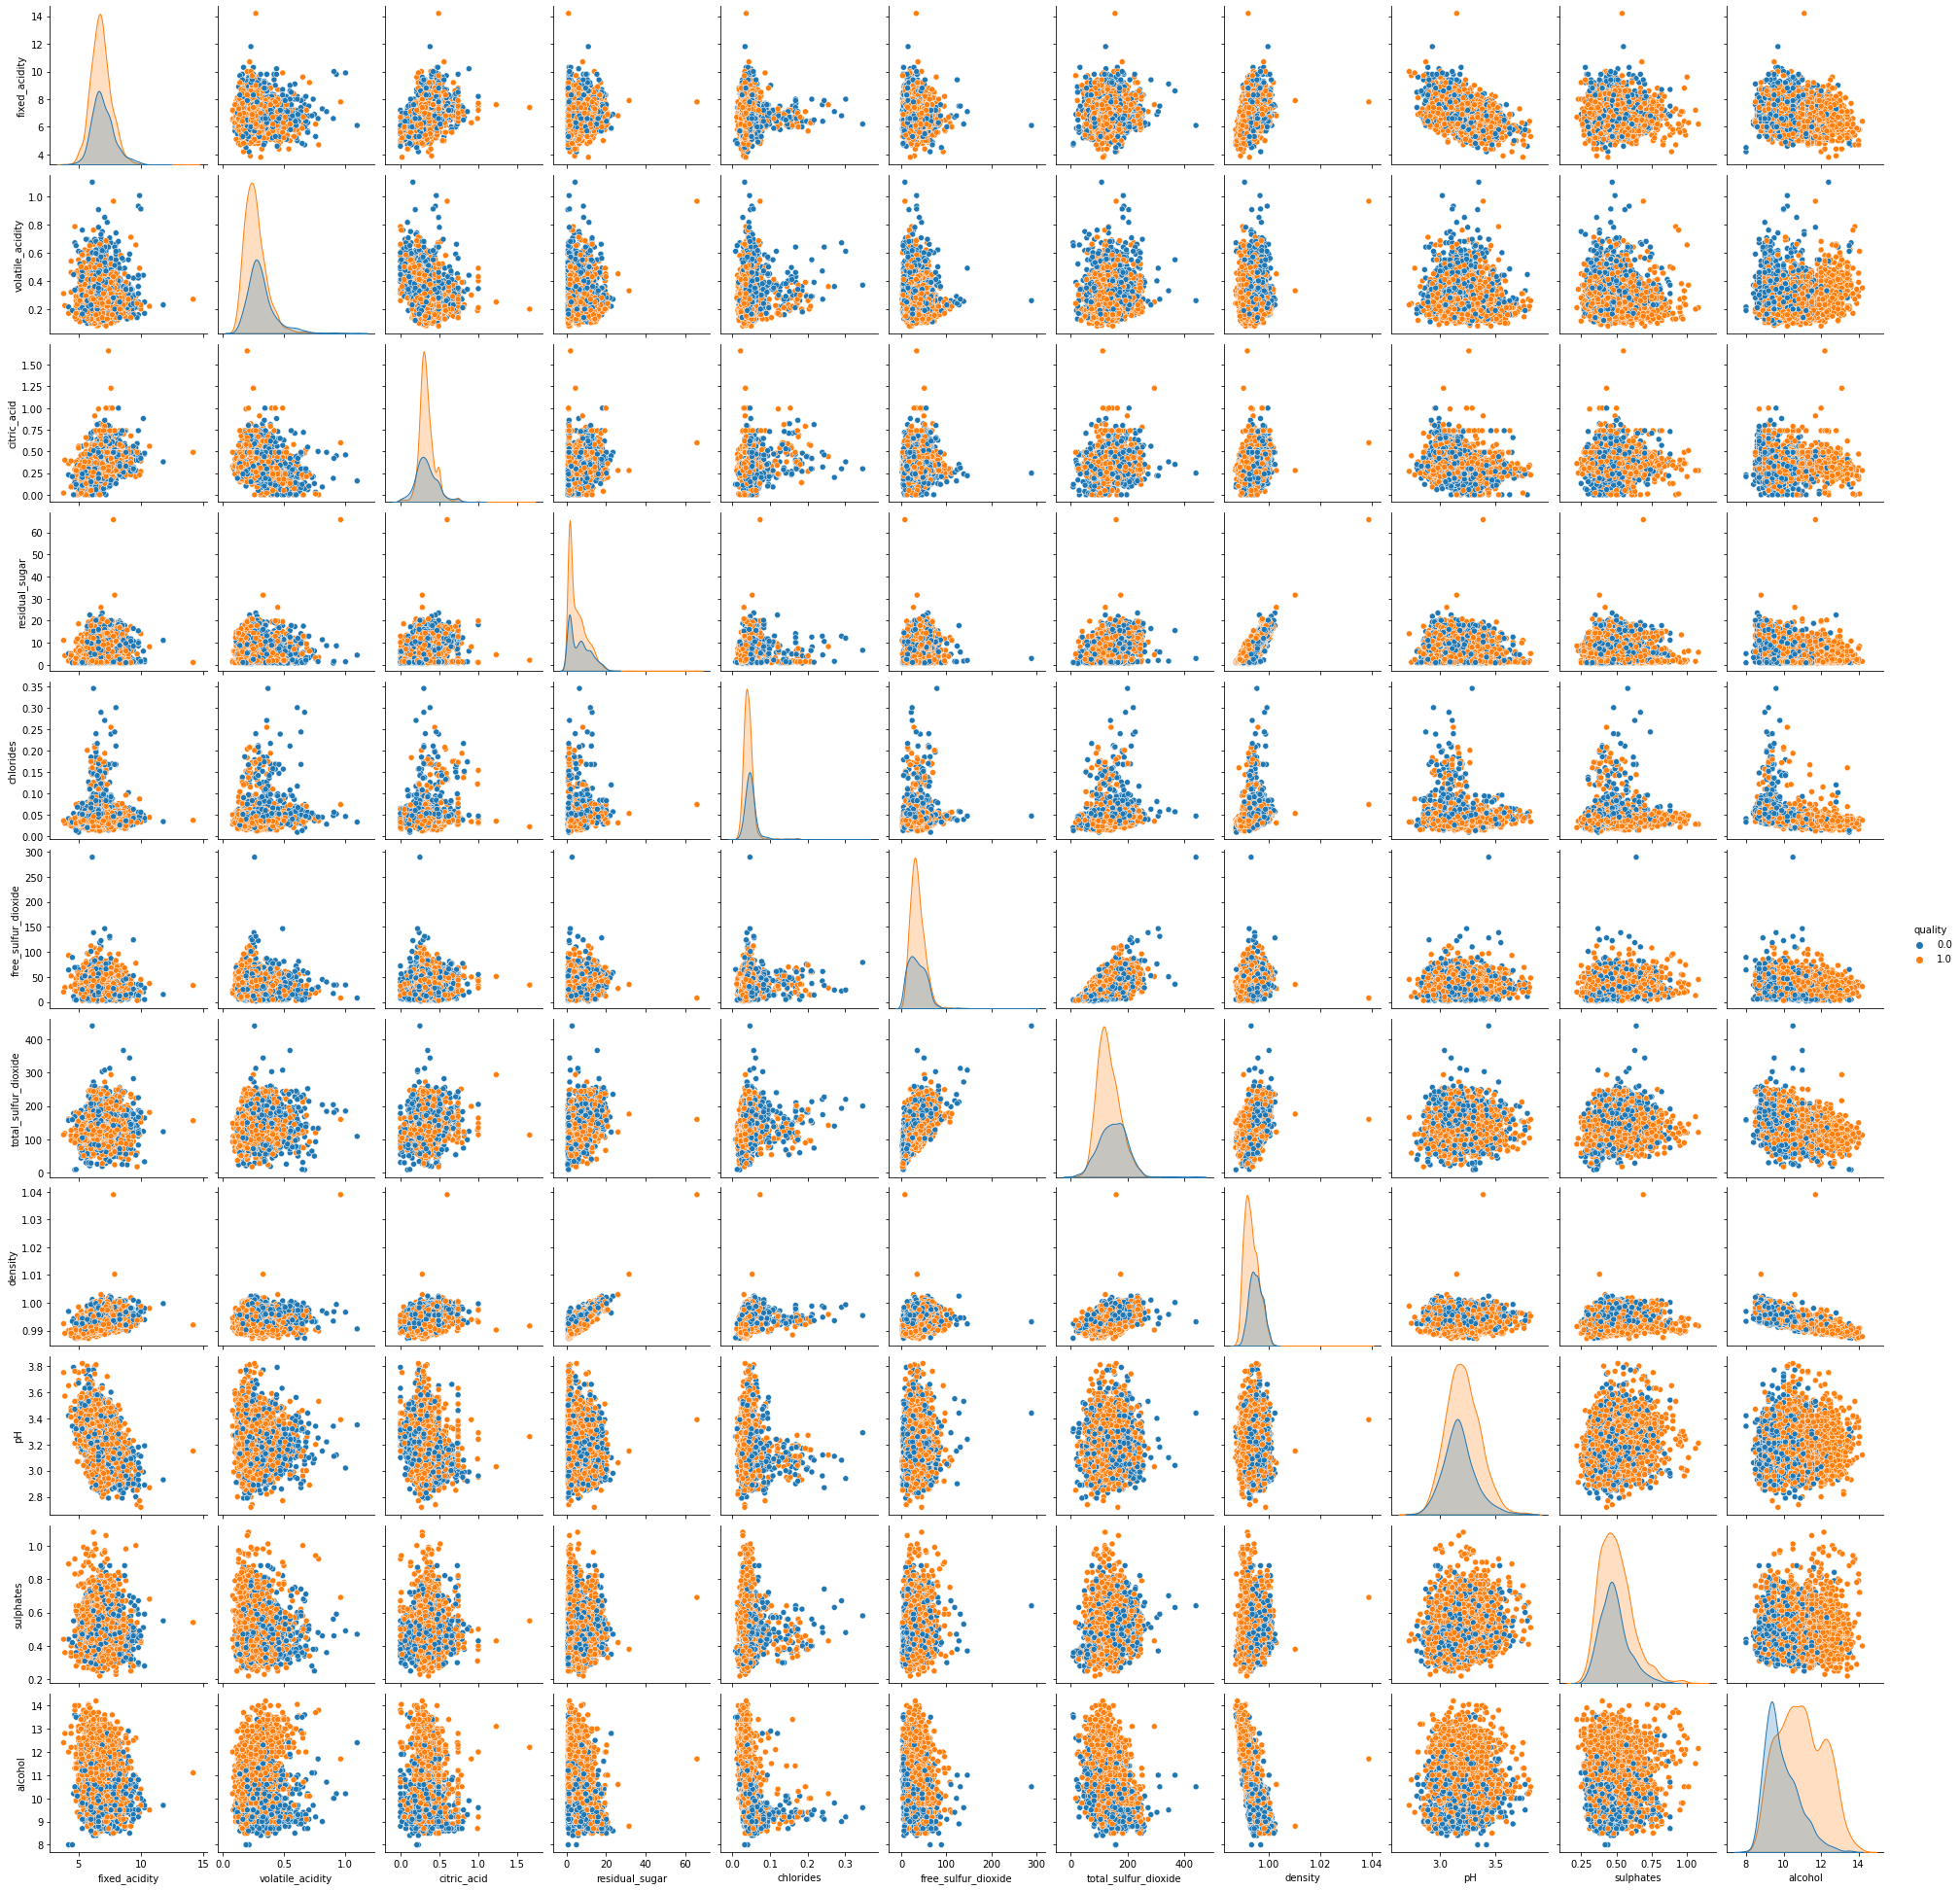

In [137]:
ax = sns.pairplot(df, hue="quality")

In [138]:
# Calculate Pearson correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)       # r: Pearson’s correlation coefficient
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)

In [139]:
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

C:\Users\ZhaoY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


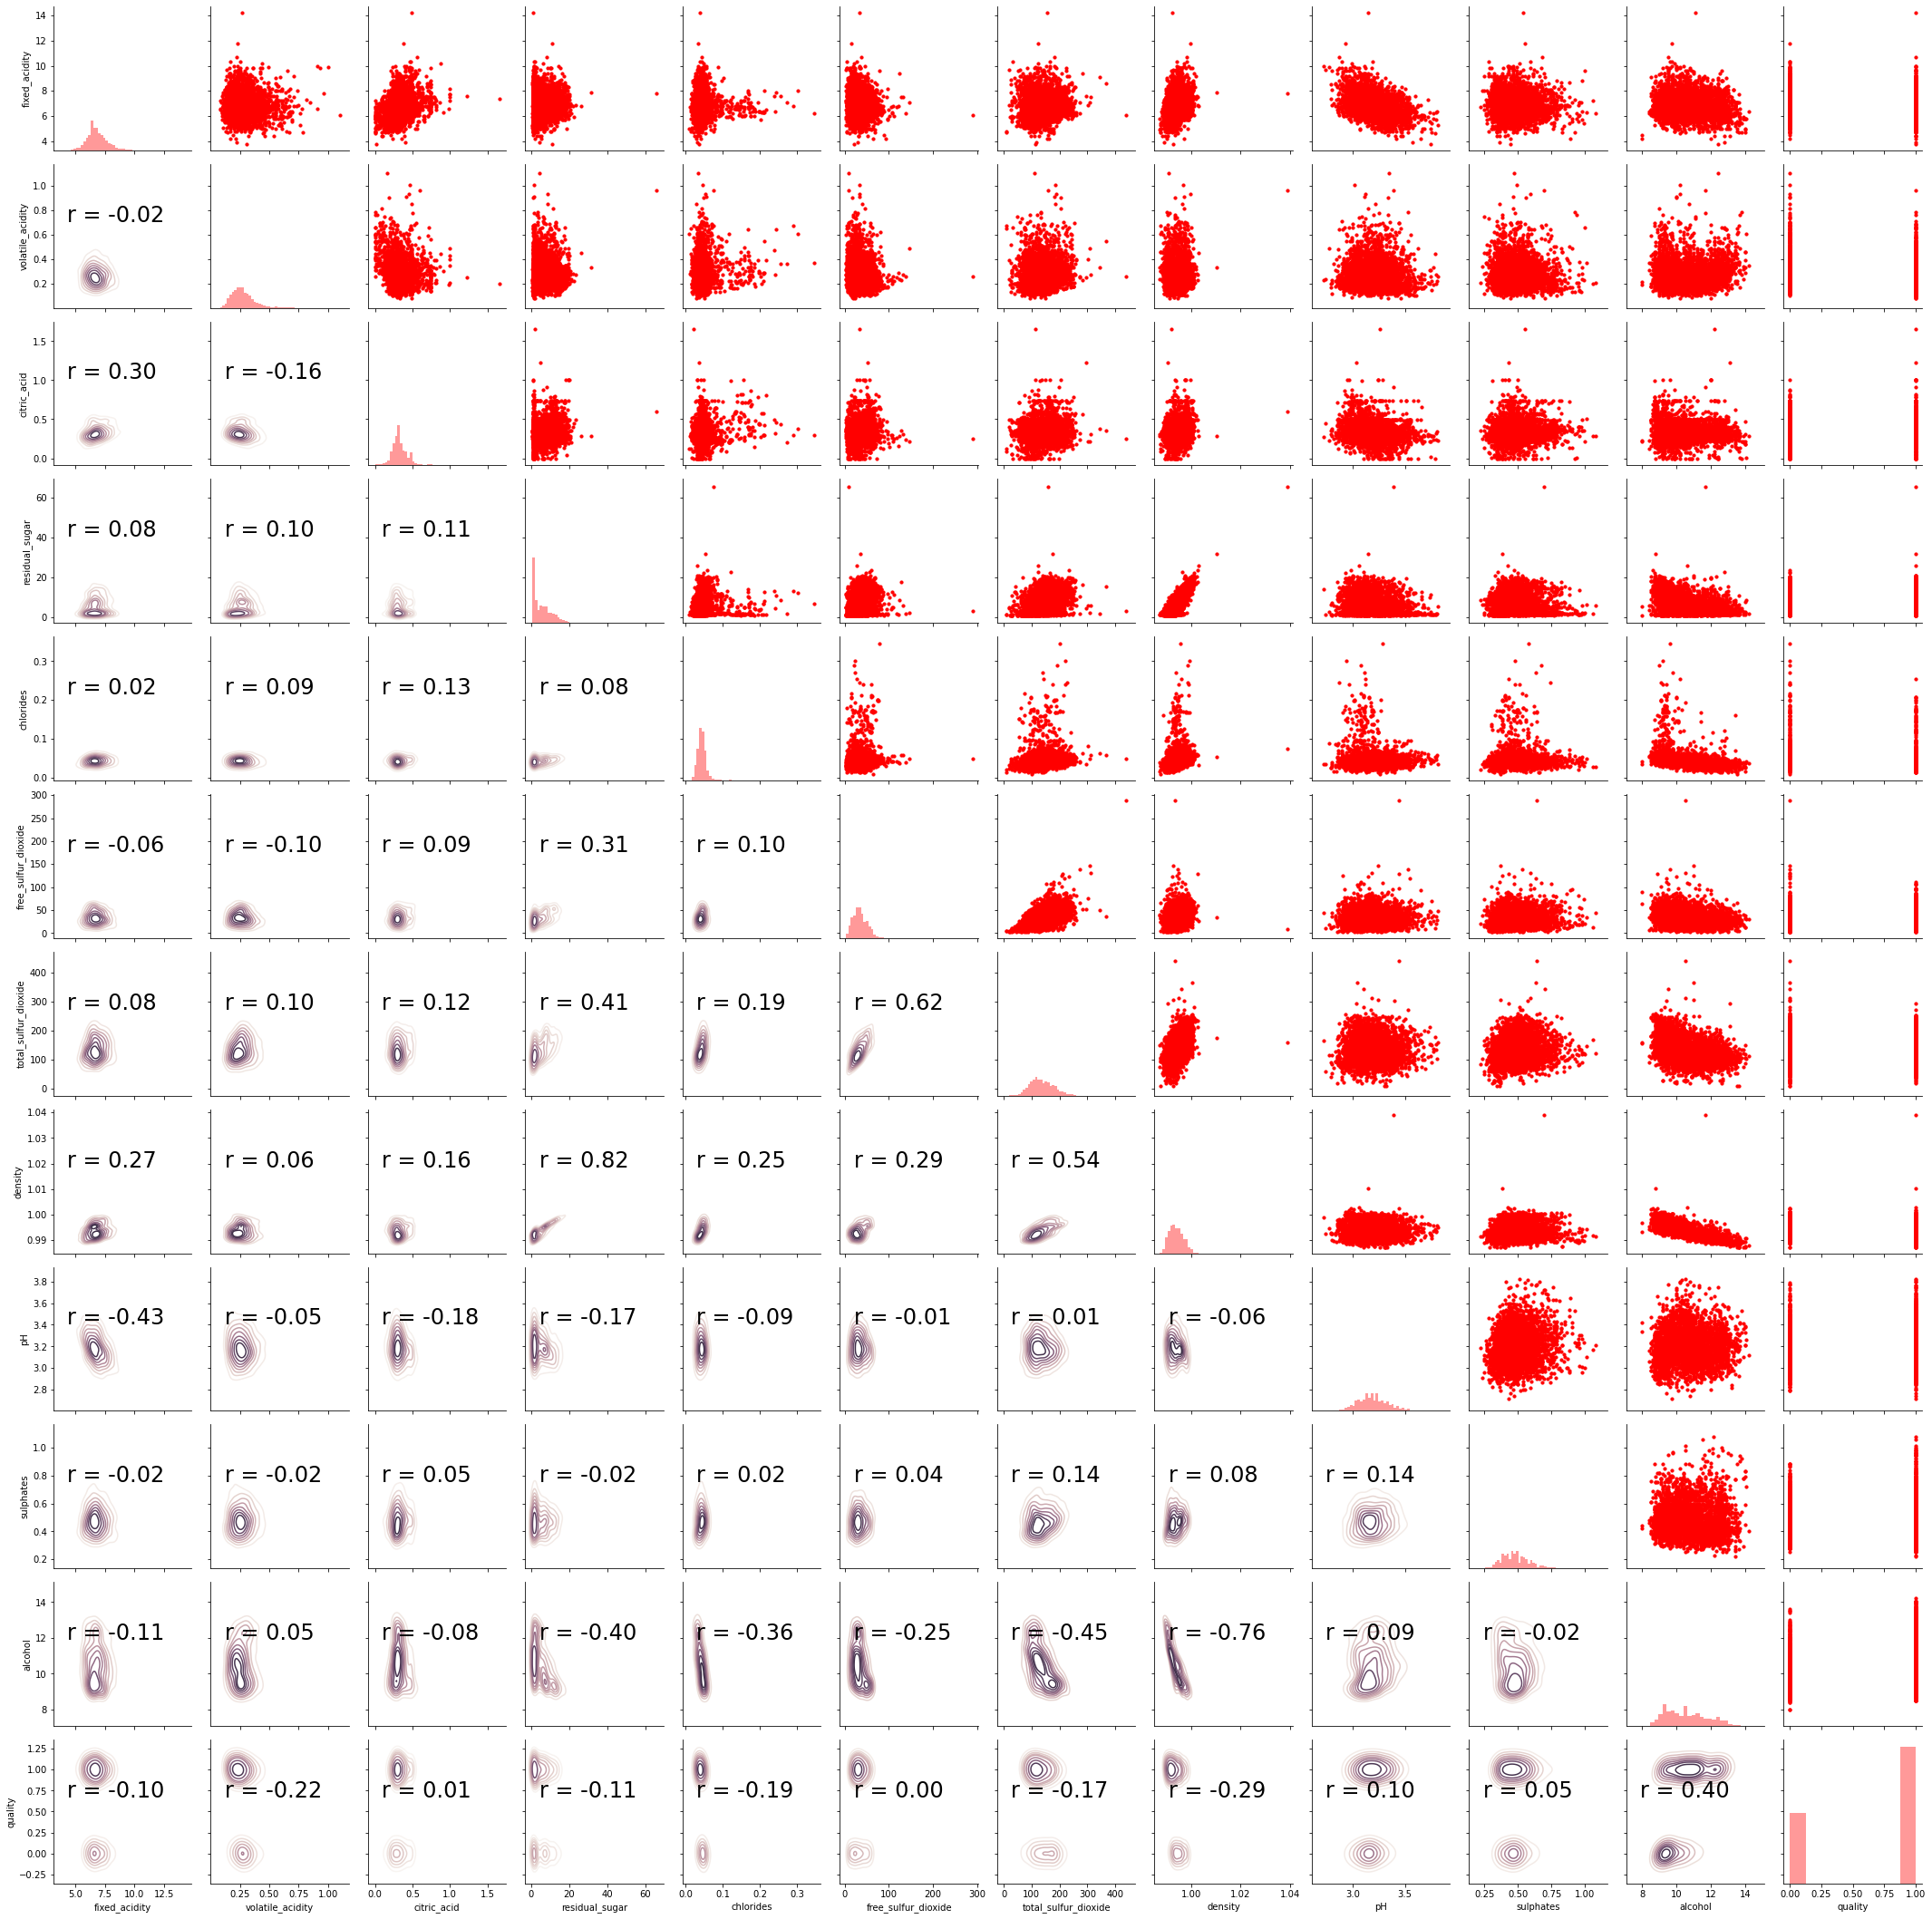

In [140]:
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc)

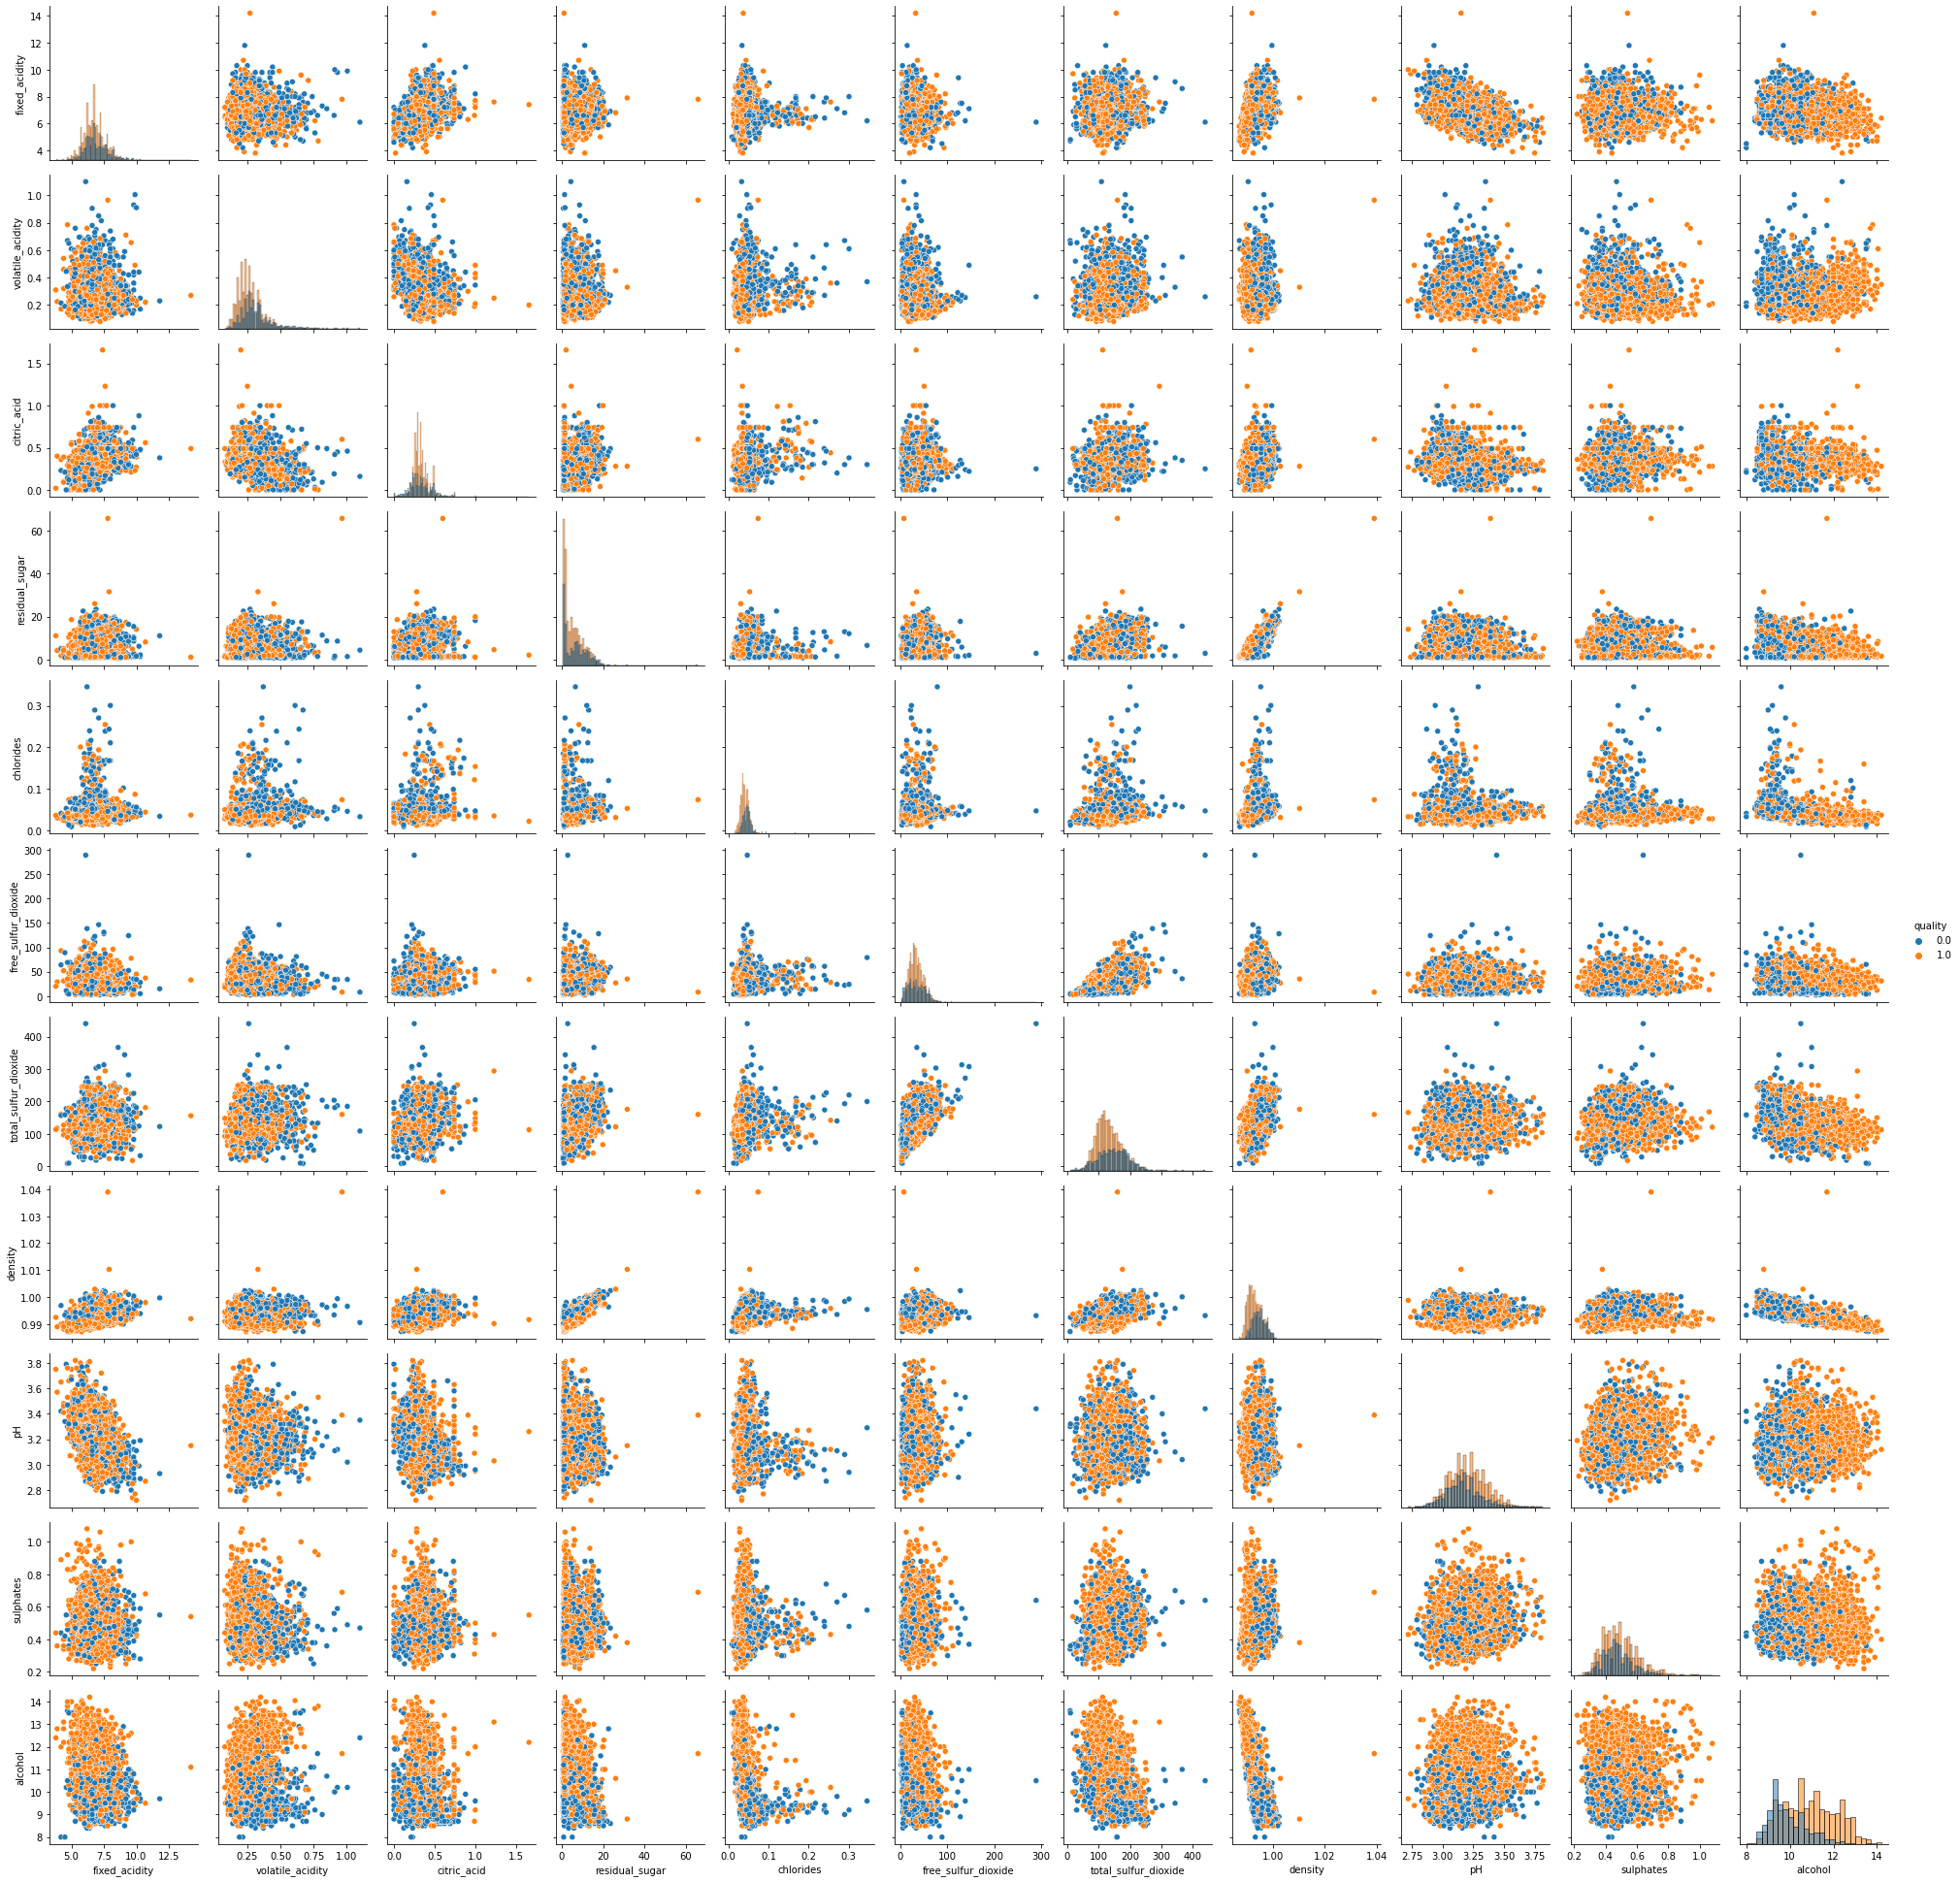

In [141]:
g = sns.PairGrid(df, hue="quality")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

15. Drop the redundant features. [1 pts]

In [842]:
df = df.drop(['residual_sugar'],axis=1)
df = df.drop(['alcohol'],axis=1)

In [843]:
df.head(2)

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0            6.2              0.33         0.29      0.042   
1            7.7              0.39         0.28      0.035   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 26.0                 138.0   0.9956  3.77       0.64   
1                 36.0                 109.0   0.9918  3.19       0.58   

   quality  
0      0.0  
1      1.0

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   chlorides             3961 non-null   float64
 4   free_sulfur_dioxide   3961 non-null   float64
 5   total_sulfur_dioxide  3961 non-null   float64
 6   density               3961 non-null   float64
 7   pH                    3961 non-null   float64
 8   sulphates             3961 non-null   float64
 9   quality               3961 non-null   float64
dtypes: float64(10)
memory usage: 309.6 KB


In [375]:
df.to_csv('Yunhua_winequality-white.csv', index=False)

In [845]:
label = df["quality"]
datasets = df.drop(['quality'],axis=1)

In [846]:
label[:5]

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: quality, dtype: float64

In [847]:
datasets.head()

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0            6.2              0.33         0.29      0.042   
1            7.7              0.39         0.28      0.035   
2            7.6              0.28         0.17      0.046   
3            6.5              0.26         0.39      0.020   
4            6.0              0.34         0.66      0.046   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  
0                 26.0                 138.0  0.99560  3.77       0.64  
1                 36.0                 109.0  0.99180  3.19       0.58  
2                 28.0                 117.0  0.99288  3.08       0.43  
3                 12.0                  66.0  0.99089  3.25       0.75  
4                 26.0                 164.0  0.99790  3.14       0.50

In [448]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn import metrics
# from keras import utils
# from sklearn.metrics import roc_auc_score

In [419]:
# tn_x, tx_x, tn_y, tx_y = train_test_split(datasets, label, shuffle=False, test_size=0.2, random_state=3)

In [420]:
# neigh = KNeighborsClassifier(n_neighbors=5)

In [421]:
# print(tn_x.shape)

(3168, 9)


In [422]:
# print(tn_y.shape)

(3168,)


In [423]:
# neigh.fit(tn_x, tn_y)

KNeighborsClassifier()

In [463]:
# pdt = neigh.predict(tx_x)

In [429]:
# print(classification_report(tx_y, pdt))

              precision    recall  f1-score   support

         0.0       0.46      0.41      0.44       249
         1.0       0.74      0.78      0.76       544

    accuracy                           0.67       793
   macro avg       0.60      0.60      0.60       793
weighted avg       0.66      0.67      0.66       793



In [431]:
# pdt = neigh.predict_proba(tx_x)

In [437]:
# pdt[:2]

array([[0.2, 0.8],
       [0.4, 0.6]])

In [442]:
#bla = [0, 1, 0, 1]
# new_tx_y = np.vstack([[a, 1-a] for a in pdt])
# new_tx_y[:3]

array([[0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6]])

In [447]:
# print(type(new_tx_y))

<class 'numpy.ndarray'>


In [450]:
# roc_auc_score(tx_y, pdt[:, 1])

0.6431682612804157

In [451]:
# fpr, tpr, thresholds = metrics.roc_curve(tx_y, pdt[:, 1], pos_label=1)

In [522]:
fpr

array([0.        , 0.12048193, 0.35341365, 0.58634538, 0.83935743,
       0.96787149, 1.        ])

In [523]:
tpr

array([0.        , 0.27389706, 0.58455882, 0.78125   , 0.90992647,
       0.98529412, 1.        ])

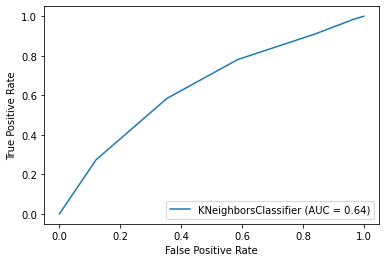

In [453]:
# metrics.plot_roc_curve(neigh, tx_x, tx_y)                                   # decrease threshold

In [454]:
# thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [456]:
# precision, recall, thresholds = metrics.precision_recall_curve(tx_y, pdt[:, 1], pos_label=1)

In [539]:
# precision

array([0.68600252, 0.68983269, 0.703125  , 0.74430823, 0.78325123,
       0.83240223, 1.        ])

In [540]:
# recall

array([1.        , 0.98529412, 0.90992647, 0.78125   , 0.58455882,
       0.27389706, 0.        ])

In [458]:
# thresholds

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

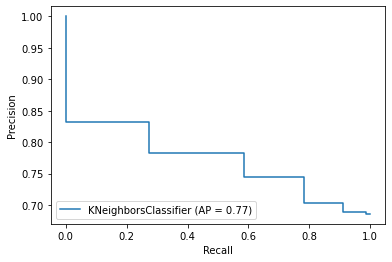

In [457]:
# metrics.plot_precision_recall_curve(neigh, tx_x, tx_y)           # increase threshold

In [464]:
# metrics.accuracy_score(tx_y, pdt)

0.6658259773013872

In [466]:
# metrics.confusion_matrix(tx_y, pdt)

array([[103, 146],
       [119, 425]], dtype=int64)

16. Write a function named “partition” to split your data into training and test set.

In [848]:
def partition(feature, label, ratio):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    
    test_size = int(len(feature)*ratio)
    train_size = len(feature) - test_size
    for index, rows in df.iterrows(): 
        my_list =[rows.fixed_acidity, rows.volatile_acidity, rows.citric_acid, rows.chlorides, rows.free_sulfur_dioxide,
                  rows.total_sulfur_dioxide, rows.density, rows.pH, rows.sulphates] 
        if(index<train_size):
            train_x.append(my_list) 
            train_y.append(label[index])
        else:
            test_x.append(my_list) 
            test_y.append(label[index])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [849]:
train_x, train_y, test_x, test_y = partition(datasets, label, 0.2)

In [504]:
train_x.shape

(3169, 9)

In [505]:
train_y.shape

(3169,)

17. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and
using Euclidean distance. [6 pts]

In [850]:
kwargs = {"neighbr":5, "distance": 1, "weight":""}

In [853]:
model = KNN_Classifier()
model.fit(train_x, train_y, 5, "" , kwargs)

In [854]:
pred_euc = model.predict(test_x)

In [855]:
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

512 792
(0.6464646464646465, 0.3535353535353535)


In [856]:
print(F1_fun(pred_euc, test_y))

0.7445255474452555


In [861]:
kwargs = {"neighbr":5, "distance": 1, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 5, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

498 792
(0.6287878787878788, 0.3712121212121212)
0.7277777777777777


In [857]:
kwargs = {"neighbr":3, "distance": 1, "weight":""}
model = KNN_Classifier()
model.fit(train_x, train_y, 3, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

504 792
(0.6363636363636364, 0.36363636363636365)
0.7377049180327868


In [862]:
kwargs = {"neighbr":3, "distance": 1, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 3, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

463 792
(0.5845959595959596, 0.41540404040404044)
0.6857688634192932


In [859]:
kwargs = {"neighbr":7, "distance": 1, "weight":""}
model = KNN_Classifier()
model.fit(train_x, train_y, 7, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

523 792
(0.6603535353535354, 0.33964646464646464)
0.757875787578758


In [863]:
kwargs = {"neighbr":7, "distance": 1, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 7, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

501 792
(0.6325757575757576, 0.36742424242424243)
0.7308048103607769


In [860]:
kwargs = {"neighbr":9, "distance": 1, "weight":""}
model = KNN_Classifier()
model.fit(train_x, train_y, 9, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

523 792
(0.6603535353535354, 0.33964646464646464)
0.758744394618834


In [864]:
kwargs = {"neighbr":9, "distance": 1, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 9, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

509 792
(0.6426767676767676, 0.3573232323232324)
0.7396504139834407


In [865]:
kwargs = {"neighbr":7, "distance": 1, "weight":""}
model = KNN_Classifier()
model.fit(train_x, train_y, 7, "" , kwargs)
pred_euc_probe = model.predict_probe(test_x)

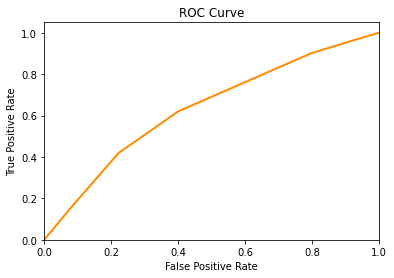

In [866]:
FPR, TPR = ROC_curve(pred_euc_probe,test_y)

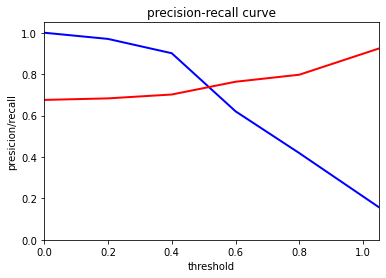

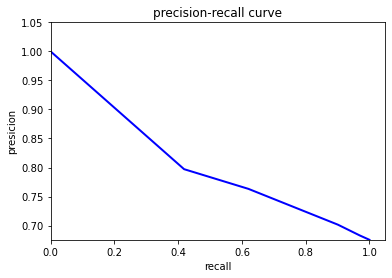

In [867]:
pre, rec = pre_rec_curve(pred_euc_probe,test_y)

In [868]:
kwargs = {"neighbr":3, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 3, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

475 792
(0.5997474747474747, 0.4002525252525253)
0.6983824928639392


In [869]:
kwargs = {"neighbr":5, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 5, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

495 792
(0.625, 0.375)
0.723720930232558


In [870]:
kwargs = {"neighbr":7, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 7, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

502 792
(0.6338383838383839, 0.36616161616161613)
0.7309833024118739


In [871]:
kwargs = {"neighbr":9, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 9, "distance" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

510 792
(0.6439393939393939, 0.3560606060606061)
0.7398523985239852


In [872]:
kwargs = {"neighbr":3, "distance":0 , "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 3, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

506 792
(0.6388888888888888, 0.36111111111111116)
0.7376146788990826


In [873]:
kwargs = {"neighbr":5, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 5, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

515 792
(0.6502525252525253, 0.3497474747474747)
0.7456382001836547


In [874]:
kwargs = {"neighbr":7, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 7, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

530 792
(0.6691919191919192, 0.3308080808080808)
0.7648114901256732


In [875]:
kwargs = {"neighbr":9, "distance": 0, "weight":"distance"}
model = KNN_Classifier()
model.fit(train_x, train_y, 9, "" , kwargs)
pred_euc = model.predict(test_x)
print(accuracy_generror(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

524 792
(0.6616161616161617, 0.33838383838383834)
0.7598566308243728


a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [686]:
print(accuracy_generror(pred_euc, test_y))

527 792
(0.6654040404040404, 0.33459595959595956)


In [687]:
print(recall_fun(pred_euc, test_y))
print(F1_fun(pred_euc, test_y))

0.7808471454880295
0.7619047619047619


b. Now standardize each feature of your training set (subtract mean and divide by
standard deviation). Use the mean and standard deviation values for each feature in
the training set to scale the test data.

In [617]:
train_x.shape[1]

9

In [631]:
train_mean = np.mean(train_x, axis=0)
test_mean = np.mean(test_x, axis=0)

In [649]:
 def standard_fea(arr, mean_arr):
    train_standard = []
    for col in range(arr.shape[1]):
        temp_col = []
        for ele in arr[:, col]:
            std_v = math.sqrt((ele - mean_arr[col])**2)
            std_v = (ele-mean_arr[col])/std_v
            temp_col.append(std_v)
        train_standard.append(temp_col)
    train_standard = np.array(train_standard)
    print(train_standard.shape)
    train_standard = np.transpose(train_standard)
    print(train_standard.shape)
    return train_standard

In [650]:
train_standard = standard_fea(train_x, train_mean)

(9, 3169)
(3169, 9)


In [651]:
test_standard = standard_fea(test_x, test_mean)

(9, 792)
(792, 9)


In [652]:
train_x[:2]

array([[6.4000e+00, 6.2000e-01, 1.2000e-01, 6.0000e-02, 3.3000e+01,
        1.9600e+02, 9.9556e-01, 3.2200e+00, 4.8000e-01],
       [8.1000e+00, 4.5000e-01, 3.4000e-01, 3.7000e-02, 3.3000e+01,
        2.1600e+02, 9.9760e-01, 3.3100e+00, 6.4000e-01]])

In [653]:
train_standard[:2]

array([[-1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.]])

c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1
score with the expected labels.

In [689]:
kwargs = {"neighbr":3, "distance": 1, "weight":""}

In [690]:
model_stan = KNN_Classifier()
model_stan.fit(train_standard, train_y, 5, "" , kwargs)

In [691]:
pred_euc_stan = model_stan.predict(test_x)

In [692]:
print(accuracy_generror(pred_euc_stan, test_y))

543 792
(0.6856060606060606, 0.31439393939393945)


In [693]:
print(F1_fun(pred_euc_stan, test_y))

0.8129226145755071


In [694]:
pred_euc_stan = model_stan.predict(test_standard)
print(accuracy_generror(pred_euc_stan, test_y))
print(F1_fun(pred_euc_stan, test_y))

512 792
(0.6464646464646465, 0.3535353535353535)
0.7402597402597403


d. Compare the two accuracy values and the F1 scores; and decide whether you should
use standardized data or unscaled data for the remainder of the assignment. This will
described in the report

I will use the standardized data, because the accuracy and F1 all improved, especially F1

e. Perform a similar test for inverse distance weighting in the KNN_Classifier model
and determine whether or not to use it. This will go in the report. [5 pts]

In [695]:
kwargs = {"neighbr":3, "distance": 1, "weight":"distance"}

In [696]:
model_stan = KNN_Classifier()
model_stan.fit(train_standard, train_y, 5, "distance" , kwargs)
pred_euc_stan = model_stan.predict(test_x)
print(accuracy_generror(pred_euc_stan, test_y))
print(F1_fun(pred_euc_stan, test_y))

543 792
(0.6856060606060606, 0.31439393939393945)
0.8129226145755071


In [697]:
model_stan = KNN_Classifier()
model_stan.fit(train_standard, train_y, 5, "distance" , kwargs)
pred_euc_stan = model_stan.predict(test_standard)
print(accuracy_generror(pred_euc_stan, test_y))
print(F1_fun(pred_euc_stan, test_y))

512 792
(0.6464646464646465, 0.3535353535353535)
0.7402597402597403


I will not use, because the performance is samiliar with the uniform distance, but more calculation 

# Part C: Model Evaluation (50 pts)

18) Evaluation of an estimator performance via cross-validation: Implement the S-fold crossvalidation
function. [10 pts]

In [573]:
datas_new = []
labels_new = []
for index, rows in datasets.iterrows(): 
    my_list =[rows.fixed_acidity, rows.volatile_acidity, rows.citric_acid, rows.chlorides, rows.free_sulfur_dioxide,
              rows.total_sulfur_dioxide, rows.density, rows.pH, rows.sulphates] 

    datas_new.append(my_list) 
    labels_new.append(label[index])

In [574]:
print(np.array(datas_new).shape)

(3961, 9)


same model, only change the predict input from 5 parameters to 3 using kwargs

In [711]:
class KNN_Classifier:
    def __init__(self):
        pass
    
    def vote_class(self, neighbr_index_list):
        if('distance'== self.weight):
            ret0 = 0
            ret1 = 0
            for ele in range(len(neighbr_index_list)):
                if(0 == neighbr_index_list[ele][1]):              # if distance is 0 then return the label probability 0 or 1
                    if(0 == self.Y[neighbr_index_list[ele][0]]):
#                         print("dist is 0 and label is 0")
                        return 0.0
                    else: 
#                         print("dist is 0 and label is 1")
                        return 1.0
                else:                                             # if distance is not 0 then calculate with different weights
                    if(0 == self.Y[neighbr_index_list[ele][0]]):
                        ret0 = ret0+(ele+1)*(1/neighbr_index_list[ele][1])                              #far distance has little weight
#                         print("dist is not 0 and label is 0, rot0:", ret0)
                    else:
                        ret1 = ret1+(ele+1)*(1/neighbr_index_list[ele][1])
#                         print("dist is not 0 and label is 1, rot1:", ret1)
        else:           
            ret0 = 0
            ret1 = 0
            for ele in neighbr_index_list:
                #print(ele[1],  self.Y[ele[0]])
                if(0 == ele[1]):
                    if(0 == self.Y[ele[0]]):
                        return 0.0
                    else: 
                        return 1.0
                else:
                    if(0 == self.Y[ele[0]]):
                        ret0 = ret0+1
                    else:
                        ret1 = ret1+1
        return ret1/(ret0+ret1)    
            
    def iterate_neighbor(self, vect, index, distancce):
#         print("input", vect)
        for ind in range(len(vect)):
#             print("index", index, ind, vect[ind])
#             print(distancce, vect[ind][1])
            if(distancce<vect[ind][1]):
                vect[ind] = [index, distancce]
                break 
#         print("before sort", vect)
        vect = sorted(vect, reverse=True, key=lambda x: x[1])
#         print("after sort",vect)
        return vect

    def covert_func(self, score):
        ret = []
        for ele in score:
            if ele > 0.5:
                ret.append(1)
            else:
                ret.append(0)
        return np.array(ret)
    
    def fit(self, X, Y, kwargs):
        self.X = X
        self.Y = Y
        self.kwargs = kwargs
        self.n_neighbors = kwargs["neighbr"]
        self.weight = kwargs["weight"]
        self.kwargs["distance"] = kwargs["distance"]
        
        
    def predict_probe(self, X):
        euc_dist_neighbr = []                                 # The probabilities of the positive class
        man_dist_neighbr = []

        for tst in X:
            ind_euc_dist = []                               # Neighbours indexes and distances[index, distance]
            ind_man_dist = []  
            
            for ind in range(len(self.X)):
                dt = Euc_distance(self.X[ind], tst)
                dt_man = Man_distance(self.X[ind], tst)
                             
                if(len(ind_euc_dist)<self.n_neighbors):
                    ind_euc_dist.append([ind, dt])
                    ind_euc_dist = sorted(ind_euc_dist, reverse=True, key=lambda x: x[1])
                    
                    ind_man_dist.append([ind, dt_man])
                    ind_man_dist = sorted(ind_man_dist, reverse=True, key=lambda x: x[1])  

                else:
                    ind_euc_dist = self.iterate_neighbor(ind_euc_dist, ind, dt)
                    ind_man_dist = self.iterate_neighbor(ind_man_dist, ind, dt_man)
#             print(ind_euc_dist)
#             print(ind_man_dist)
            euc_dist_neighbr.append(self.vote_class(ind_euc_dist))
            man_dist_neighbr.append(self.vote_class(ind_man_dist))
        
        if(1 == self.kwargs["distance"]):
            return euc_dist_neighbr
        else:
            return man_dist_neighbr
    
    def predict(self, X):
        ret = self.predict_probe(X)
        #print(ret)
        nbr = self.covert_func(ret)
        return nbr

In [712]:
def s_partition(data, label, s):
    data_list = []
    label_list = []
    interval = int(len(data)/s)
    
    temp_data = []
    temp_label = []
    for ind in range(len(data)):        
        temp_data.append(data[ind])
        temp_label.append(label[ind])
        
        if(0 == (ind+1)%interval):
            data_list.append(temp_data)
            label_list.append(temp_label)
            temp_data = []
            temp_label = []
        
    
    return data_list, label_list

In [713]:
def sFold(folds, data, labels, model, model_args, error_fuction):
    if(1 == folds):
        predict_label = []
        exp_label = []
        ave_arr = []
        model.fit(data, labels, model_args)
        predct = model.predict(data)
        
        predict_label.append(predct)
        exp_label.append(labels)
        
        err = error_fuction(predct, labels)
        ave_arr.append(err)
    elif(folds<1):
        print("Invalid folds number, the least is 1")
        return {}
    else:        
        data_list, label_list = s_partition(data, label, folds)
        #print(np.array(data_list).shape)

        ret = {}
        predict_label = []
        exp_label = []
        ave_arr = []

        for ind in range(folds):
            train_x = []
            train_y = []
            test_x = []
            test_y = []
            for i in range(folds):
                if(ind != i):
                    train_x = train_x + data_list[i]
                    train_y = train_y + label_list[i]
                else:
                    test_x = test_x + data_list[i]
                    test_y = test_y + label_list[i]

            #print(np.array(train_x).shape)
            model.fit(train_x, train_y, model_args)
            predct = model.predict(test_x)

            predict_label.append(predct)
            exp_label.append(test_y)

            err = error_fuction(predct, test_y)
            ave_arr.append(err)

    ret = {"Expected_labels": exp_label, "Predicted labels": predict_label, "Average error": ave_arr}
    return ret

19) Use your sfold function to evaluate the performance of your model over each combination of
k and distance metrics from the following sets:

In [714]:
folders=[1,5,9,11]
distance = [1, 0]
weights = ["uniform", "distance"]

model_args_list=[]

for k in folders:  
    for w in weights: 
        for d in distance: 
            model_args = {"folds":k, "neighbr":3, "weight":w, "distance": d}
            model_args_list.append(model_args)

In [721]:
model_args_list

[{'folds': 1, 'neighbr': 3, 'weight': 'uniform', 'distance': 1},
 {'folds': 1, 'neighbr': 3, 'weight': 'uniform', 'distance': 0},
 {'folds': 1, 'neighbr': 3, 'weight': 'distance', 'distance': 1},
 {'folds': 1, 'neighbr': 3, 'weight': 'distance', 'distance': 0},
 {'folds': 5, 'neighbr': 3, 'weight': 'uniform', 'distance': 1},
 {'folds': 5, 'neighbr': 3, 'weight': 'uniform', 'distance': 0},
 {'folds': 5, 'neighbr': 3, 'weight': 'distance', 'distance': 1},
 {'folds': 5, 'neighbr': 3, 'weight': 'distance', 'distance': 0},
 {'folds': 9, 'neighbr': 3, 'weight': 'uniform', 'distance': 1},
 {'folds': 9, 'neighbr': 3, 'weight': 'uniform', 'distance': 0},
 {'folds': 9, 'neighbr': 3, 'weight': 'distance', 'distance': 1},
 {'folds': 9, 'neighbr': 3, 'weight': 'distance', 'distance': 0},
 {'folds': 11, 'neighbr': 3, 'weight': 'uniform', 'distance': 1},
 {'folds': 11, 'neighbr': 3, 'weight': 'uniform', 'distance': 0},
 {'folds': 11, 'neighbr': 3, 'weight': 'distance', 'distance': 1},
 {'folds': 11, 

In [716]:
ret = []

for model_args in model_args_list:
    ret.append(sFold(model_args["folds"], train_standard, train_y, KNN_Classifier(), model_args, F1_fun))

In [717]:
errors = []
for r in ret:
    sum_err = 0
    for err in r["Average error"]:
        sum_err = sum_err+err
    errors.append(sum_err/len(r["Average error"]))

print(errors)
new_sum = 0
for err in errors[0:4]:
    new_sum = new_sum+err
print(new_sum/4)
new_sum = 0
for err in errors[4:8]:
    new_sum = new_sum+err
print(new_sum/4)
new_sum = 0
for err in errors[8:12]:
    new_sum = new_sum+err
print(new_sum/4)
new_sum = 0
for err in errors[12:16]:
    new_sum = new_sum+err
print(new_sum/4)


[0.7304170905391658, 0.7304170905391658, 0.7304170905391658, 0.7304170905391658, 0.6944720895114168, 0.6944720895114168, 0.6940775556168168, 0.6940775556168168, 0.6916532381039808, 0.6916532381039808, 0.6924093192314679, 0.6924093192314679, 0.6895209953407316, 0.6895209953407316, 0.6902574134436997, 0.6902574134436997]
0.7304170905391658
0.6942748225641169
0.6920312786677244
0.6898892043922157


In [718]:
print(len(errors))

16


20) Evaluate your model on the test data and report the performance measures

In [760]:
model_args = {"neighbr":3, "weight":"distance", "distance": 0}

In [772]:
model = KNN_Classifier()
model.fit(train_x, train_y, model_args)
predct = model.predict(test_x)

In [773]:
print(precision_fun(pred_euc,test_y))

0.743859649122807


In [774]:
print(recall_fun(pred_euc,test_y))

0.7808471454880295


In [775]:
print(F1_fun(pred_euc,test_y))

0.7619047619047619


In [776]:
[[TN, FP], [FN, TP]] = conf_matrix(pred_euc,test_y)
print(TN, FP)
print(FN, TP)

103 146
119 424


In [777]:
print(accuracy_generror(pred_euc,test_y))

527 792
(0.6654040404040404, 0.33459595959595956)


21) Generate the ROC curve and determine the optimal threshold. This will go in your report. [8
pts]

In [778]:
predct_probe = model.predict_probe(test_x)

In [779]:
predct_probe

[0.6672807312027126,
 1.0,
 0.8607395781378886,
 0.8448527322408274,
 0.6676845184174071,
 1.0,
 0.29179940979633995,
 0.9280731810003152,
 0.2781875221020733,
 1.0,
 0.2702509000964438,
 0.6553752821743349,
 1.0,
 0.44408572554631565,
 0.6916788458875434,
 0.3506870138329776,
 0.45396124391520887,
 0.6988097733908113,
 1.0,
 0.30747167484620624,
 0.32273898502592857,
 1.0,
 1.0,
 0.4893090060505765,
 1.0,
 0.4527048363926656,
 0.0,
 0.8754629599852504,
 1.0,
 0.36280139005906803,
 0.36434158562704,
 1.0,
 1.0,
 0.2968303497285558,
 0.44119368291471556,
 0.10006449378465788,
 0.14425607446212316,
 0.7005475601962298,
 0.8822130396787949,
 0.11210056431938027,
 0.11241144191798472,
 1.0,
 0.4601353610680345,
 0.28279683760496427,
 0.0,
 0.28930876152810997,
 0.4563803839690921,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.6682247316586649,
 0.46800810612816673,
 0.9374141385529393,
 0.711009795261559,
 0.8531504030195123,
 0.47169660114217554,
 0.6583707206539482,
 1.0,
 0.7901257687627874,
 1.0,
 

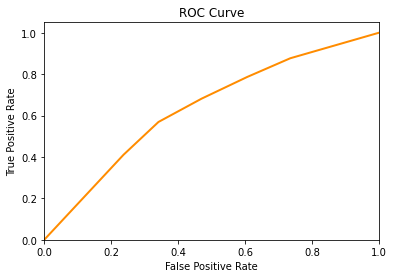

In [808]:
FPR, TPR = ROC_curve(predct_probe,test_y)

In [796]:
TPR

[0.0,
 0.4106813996316759,
 0.569060773480663,
 0.6813996316758748,
 0.7863720073664825,
 0.8766114180478821,
 1.0]

In [799]:
specificity_list = []
for ele in FPR:
    specificity_list.append(1-ele)
    
print(specificity_list)

[1.0, 0.7630522088353413, 0.6586345381526104, 0.5301204819277108, 0.39357429718875503, 0.2650602409638554, 0.0]


In [804]:
gmean = []
for i in range(len(TPR)):
    gmean.append(math.sqrt(TPR[i]*specificity_list[i]))

In [805]:
gmean

[0.0,
 0.5597958101991652,
 0.612211629848865,
 0.6010190522182964,
 0.5563234761612832,
 0.4820319841042071,
 0.0]

So choose the third threshold 0.8

22) Compute the AUC score. [2 pts]

In [781]:
AUC_func(FPR, TPR)

0.7293927089573765

23) Generate the precision-recall curve and determine the optimal threshold. [5 pts]

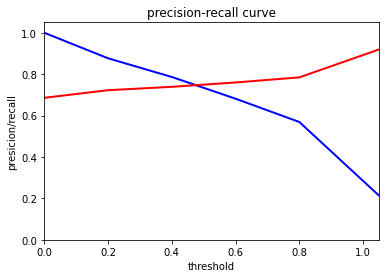

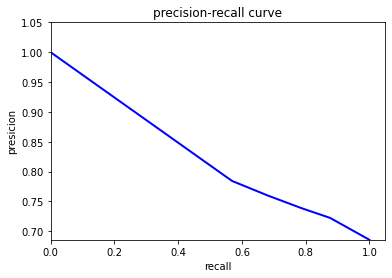

In [819]:
pre, rec = pre_rec_curve(predct_probe,test_y)

Threshold will chose 0.5

24) Calculate and report the 95% confidence interval on the generalization error estimate. [5pts]

In [783]:
interval = 1.96 * math.sqrt( (0.33459595959595956 * (1 - 0.33459595959595956)) / 50)
print('%.3f' % interval)

0.131
